In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
import keras 

Using TensorFlow backend.


In [4]:
keras.backend.clear_session()

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42)

In [10]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train =scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
X_train.shape

(11610, 8)

In [22]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input)
hidden2 =keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input],outputs=[output])

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_6[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_6[0][0]                    
                                                                 dense_7[0][0]              

In [24]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [30]:
model_history=model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/40
11610/11610 [==============================] - 1s 76us/step - loss: 0.3695 - mae: 0.4340 - val_loss: 0.3614 - val_mae: 0.4229
Epoch 2/40
11610/11610 [==============================] - 1s 75us/step - loss: 0.3685 - mae: 0.4335 - val_loss: 0.3634 - val_mae: 0.4248
Epoch 3/40
11610/11610 [==============================] - 1s 72us/step - loss: 0.3678 - mae: 0.4329 - val_loss: 0.3667 - val_mae: 0.4230
Epoch 4/40
11610/11610 [==============================] - 1s 72us/step - loss: 0.3664 - mae: 0.4323 - val_loss: 0.3866 - val_mae: 0.4259
Epoch 5/40
11610/11610 [==============================] - 1s 72us/step - loss: 0.3663 - mae: 0.4316 - val_loss: 0.3576 - val_mae: 0.4223
Epoch 6/40
11610/11610 [==============================] - 1s 71us/step - loss: 0.3646 - mae: 0.4313 - val_loss: 0.3585 - val_mae: 0.4210
Epoch 7/40
11610/11610 [==============================] - 1s 71us/step - loss: 0.3642 - mae: 0.4303 - val_loss: 0.3539 - val_mae:

In [31]:
mae_test = model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 36us/step


In [32]:
mae_test

[0.3516756274441416, 0.4178646504878998]

In [33]:
model_history.history

{'val_loss': [0.3614385931374799,
  0.3634248106670626,
  0.3667256153292126,
  0.3865832791694991,
  0.3575900099228211,
  0.35854262965286116,
  0.35387327571709953,
  0.34202011761277223,
  0.3592836900043857,
  0.3698391718457836,
  0.38493245043803864,
  0.3419736981006864,
  0.343406812742699,
  0.34081313540769176,
  0.34068675677289645,
  0.3457312054335301,
  0.34552544350001857,
  0.33932646497583513,
  0.3389537351615053,
  0.3480596800106132,
  0.3507414584397038,
  0.33641446841163536,
  0.34927638027557106,
  0.3642971780488041,
  0.33647414679983173,
  0.33795134500631685,
  0.33702820035068254,
  0.34965643804202706,
  0.3362808770526595,
  0.34126633304804177,
  0.34094961423436493,
  0.3396222466107179,
  0.33713571837398126,
  0.33749021477323476,
  0.3498656411426628,
  0.3465569462039982,
  0.33213974734917473,
  0.34832918444499184,
  0.333235140063966,
  0.34447050274034496],
 'val_mae': [0.4228583872318268,
  0.4247593283653259,
  0.4229685664176941,
  0.4258648

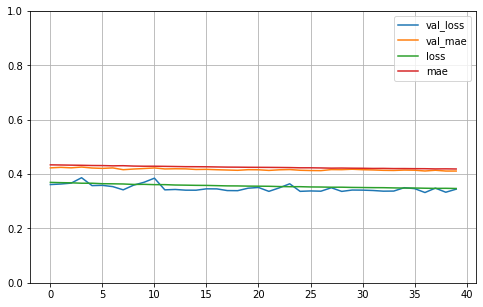

In [34]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
model.save("functional_api.h5")

In [36]:
%pwd

'C:\\Users\\GAURAV KANOJIA'

In [41]:
del model

In [38]:
model = keras.models.load_model("functional_api.h5")

In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_6[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_6[0][0]                    
                                                                 dense_7[0][0]              

In [42]:
np.random.seed(42)

In [43]:
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [55]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 80us/step - loss: 0.3988 - val_loss: 0.4367
Epoch 2/10
11610/11610 [==============================] - 1s 98us/step - loss: 0.3970 - val_loss: 0.3726
Epoch 3/10
11610/11610 [==============================] - 1s 100us/step - loss: 0.3940 - val_loss: 0.4344
Epoch 4/10
11610/11610 [==============================] - 1s 68us/step - loss: 0.3928 - val_loss: 0.3694
Epoch 5/10
11610/11610 [==============================] - 1s 88us/step - loss: 0.3902 - val_loss: 0.4181
Epoch 6/10
11610/11610 [==============================] - 1s 89us/step - loss: 0.3890 - val_loss: 0.3637
Epoch 7/10
11610/11610 [==============================] - 1s 83us/step - loss: 0.3867 - val_loss: 0.4352
Epoch 8/10
11610/11610 [==============================] - 1s 80us/step - loss: 0.3853 - val_loss: 0.3934
Epoch 9/10
11610/11610 [==============================] - 1s 82us/step - loss: 0.3841 - val_loss: 0.3695
Epoch

## best fit model

In [56]:
del model

In [57]:
keras.backend.clear_session()

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [59]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [61]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 140us/step - loss: 1.8919 - val_loss: 1.3479
Epoch 2/10
11610/11610 [==============================] - 2s 169us/step - loss: 0.7909 - val_loss: 0.7224
Epoch 3/10
11610/11610 [==============================] - 3s 240us/step - loss: 0.6966 - val_loss: 0.6708
Epoch 4/10
11610/11610 [==============================] - 2s 183us/step - loss: 0.6508 - val_loss: 0.6335
Epoch 5/10
11610/11610 [==============================] - 2s 196us/step - loss: 0.6132 - val_loss: 0.5771
Epoch 6/10
11610/11610 [==============================] - 2s 134us/step - loss: 0.5813 - val_loss: 0.5348
Epoch 7/10
11610/11610 [==============================] - 2s 170us/step - loss: 0.5514 - val_loss: 0.5059
Epoch 8/10
11610/11610 [==============================] - 2s 140us/step - loss: 0.5251 - val_loss: 0.4959A: 0s - loss: 0.52
Epoch 9/10
11610/11610 [==============================] - 1s 87us/step - loss: 0.5013

## best Model only

In [62]:
del model
keras.backend.clear_session()

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [64]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [66]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop.h5",save_best_only=True)

In [67]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [68]:
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 80us/step - loss: 2.1958 - val_loss: 2.9140
Epoch 2/200
11610/11610 [==============================] - 1s 84us/step - loss: 0.7576 - val_loss: 0.7994
Epoch 3/200
11610/11610 [==============================] - 1s 70us/step - loss: 0.6685 - val_loss: 0.6300
Epoch 4/200
11610/11610 [==============================] - 1s 85us/step - loss: 0.6283 - val_loss: 0.5996
Epoch 5/200
11610/11610 [==============================] - 1s 79us/step - loss: 0.5971 - val_loss: 0.5641
Epoch 6/200
11610/11610 [==============================] - 1s 79us/step - loss: 0.5679 - val_loss: 0.5316
Epoch 7/200
11610/11610 [==============================] - 1s 71us/step - loss: 0.5437 - val_loss: 0.5145
Epoch 8/200
11610/11610 [==============================] - 1s 83us/step - loss: 0.5207 - val_loss: 0.4770
Epoch 9/200
11610/11610 [==============================] - 1s 89us/step - loss: 0.5012 - val_loss: 0.45